In [15]:
#WEEK 1:Project Introduction and Data Collection
import pandas as pd

#Check if pandas works
print("Pandas version:", pd.__version__)

#Load dataset (replace the filename with yours)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

#Show first 5 rows
print(df.head())

Pandas version: 2.3.3
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  Stoc

In [16]:
#WEEK 2:Data Exploration and Cleaning
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Check for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

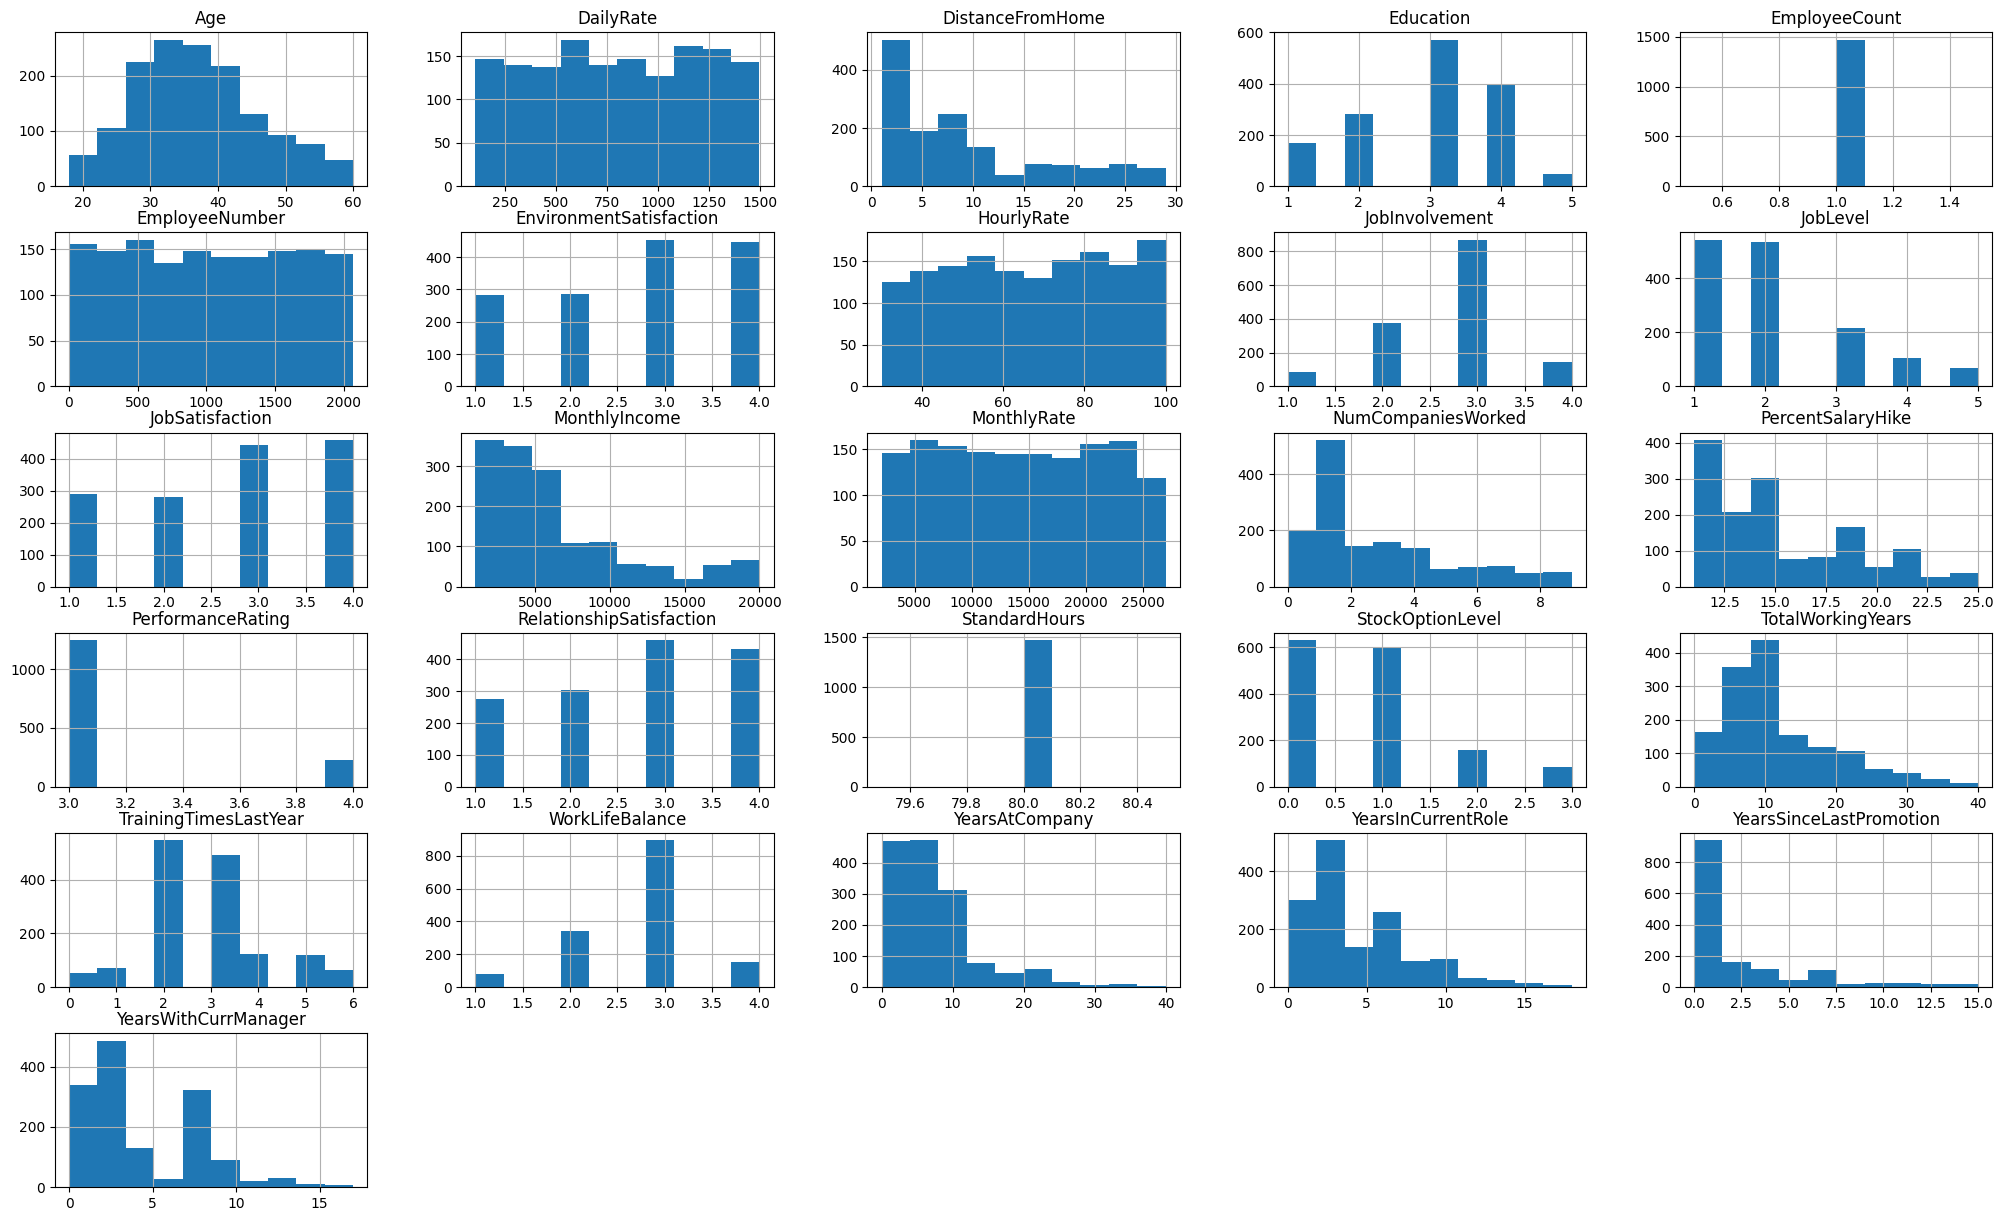

In [18]:
# Visualize numerical distributions
df.hist(figsize=(25, 15))
plt.show()

In [19]:
#WEEK 3: Feature Engineering and Selection
#dropping irrelevant columns
cols_to_drop = [   #columns to drop: These columns are not relevant for predicting attrition. E.g, Hourly Rate is covered under Monthly Rate.
    'HourlyRate',
]
df = df.drop(columns=cols_to_drop)
print("Columns after dropping irrelevant ones:", df.columns.tolist())

Columns after dropping irrelevant ones: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [20]:
#adding columns
#Promotion gap column, This let's us see when the last time employee 'x' got a promotion
df['PromotionGap'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']

#Workload and work pressure column, this let's us know whether employee 'x' is stressed at work, whether he/she is overworking etc.
df['WorkloadPressure'] = df['JobLevel'] * (df['OverTime'] == 'Yes').astype(int)
print("Columns after adding new ones:", df.columns.tolist())

Columns after adding new ones: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PromotionGap', 'WorkloadPressure']


In [21]:
#WEEK 4:Model Building
#Model used is Random Forest Model
#encoding categorical columns
df_encoded = pd.get_dummies(df, drop_first=True) #This changes words into binary. E.g, 'Overtime:Yes' turns to 'Overtime_Yes=1.

#defining x and y. 
#x stands for all information about Employee except for whether they left or stayed- Y stands for this. 
X = df_encoded.drop(columns=['Attrition_Yes'])
y = df_encoded['Attrition_Yes']  #1 for whether they left. 0 for whether they did not leave.
print("Feature set shape:", X.shape) #This shows how big our data is. Eg, 1000 rows(employees) and 20 columns(features)
print("Target variable shape:", y.shape) #This shows labels for the employees. Eg, 1000 rows of 1s and 0s.

Feature set shape: (1470, 48)
Target variable shape: (1470,)


In [22]:
# Installing sklearn
%pip install scikit-learn
import sklearn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\HomePC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
#Week 4: Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
X = df.drop(columns=['Attrition']) #Features(eg, age, salary)
y = df['Attrition'].map({'Yes': 1, 'No': 0}) #Target variable(whether they left or not)

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #20% of the data goes to testing, 80% for training while random_state=42 ensures you get the same split every time 
)

# Create and train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (1176, 48) (1176,)


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation Metrics:

Accuracy: 0.87
Precision (Left): 0.56
Recall (Left): 0.26
F1 Score (Left): 0.35

Confusion Matrix:
 [[247   8]
 [ 29  10]]


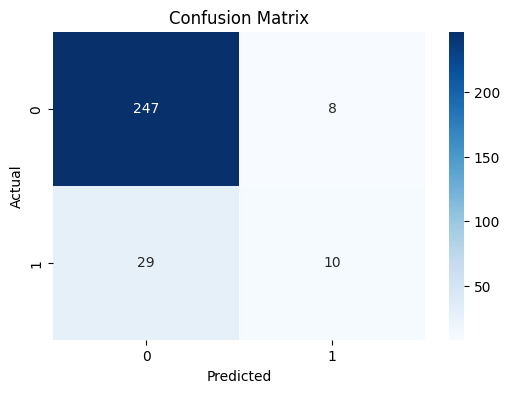

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.26      0.35        39

    accuracy                           0.87       294
   macro avg       0.73      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



In [24]:
# WEEK 5: Model Evaluation and Reporting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


#Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Of all employees predicted to leave, how many actually left
recall = recall_score(y_test, y_pred, pos_label=1) #Of all employees who actually left, how many did the model correctly predict
f1 = f1_score(y_test, y_pred, pos_label=1)

#print metrics
print("Model Evaluation Metrics:\n")
print(f"Accuracy: {accuracy:.2f}") # Overall % of correct predictions")
print(f"Precision (Left): {precision:.2f}") ## Correctly predicted leaving employees / All predicted leaving")
print(f"Recall (Left): {recall:.2f}") #Correctly predicted leaving employees / All actual leaving")
print(f"F1 Score (Left): {f1:.2f}\n") # Balance of precision and recall\n")

#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

'''cm[0,0] = True Negatives (correctly predicted stayed)
cm[0,1] = False Positives (predicted leaving but actually stayed)
cm[1,0] = False Negatives (missed predicting leaving employees)
cm[1,1] = True Positives (correctly predicted leaving employees)'''

#Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Detailed Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
